# Import libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To get matplotlib graphics to show up inline
%matplotlib inline

# Read the dataset in a dataframe using Pandas
df = pd.read_csv("train.csv") 

# Data exploration

In [4]:
# Print first 5 rows
# We can see that some columns have missing values
df.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Print more rows of data
df.head(10) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
# Print last 5 rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
# Data dimension
df.shape

(614, 13)

In [9]:
# Data type
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
# How many columns have categorical values?
(df.dtypes == object).sum()

8

In [11]:
# Find all the distinct values present in the column “Education”
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

# Descriptive statistics

In [12]:
# Summary of numeric variables
# Pands 0.18 does not exclude null values when calculating quantiles
# 1. Missing values in columns LoanAmount, Loan_Amount_Term, Credit_History
# 2. 84% applicants have a credit history record
df.describe()

/Users/yingwu/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
# Statistics of individual column
np.mean(df['ApplicantIncome'])

5403.459283387622

In [14]:
# Frequency table for non-numeric variables
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [15]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

# Visualization

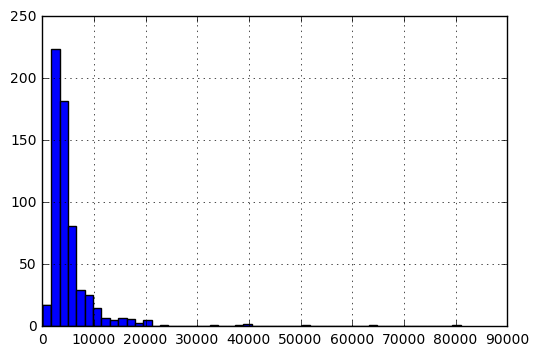

In [20]:
# Histogram of Applicant Income
# Several extreme cases, increase number of bins to show distribution clearly
df['ApplicantIncome'].hist(bins=50)

/Users/yingwu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


{'boxes': [<matplotlib.lines.Line2D at 0x116ad0978>],
 'caps': [<matplotlib.lines.Line2D at 0x116adbc88>,
 'fliers': [<matplotlib.lines.Line2D at 0x116ae5be0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x116ae1cf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x116ad0c18>,
  <matplotlib.lines.Line2D at 0x116ad06d8>]}

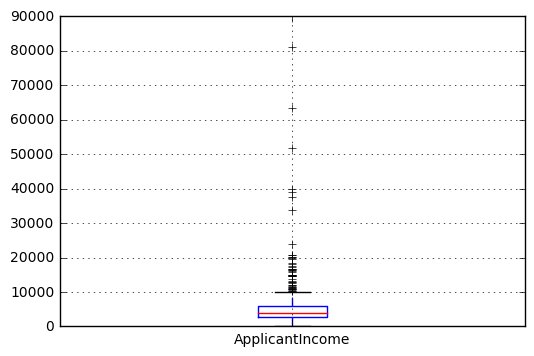

In [21]:
# Boxplot of Applicant Income
# A lot of outliers - could be due to the fact that we are looking at people with different education levels
df.boxplot(column='ApplicantIncome')

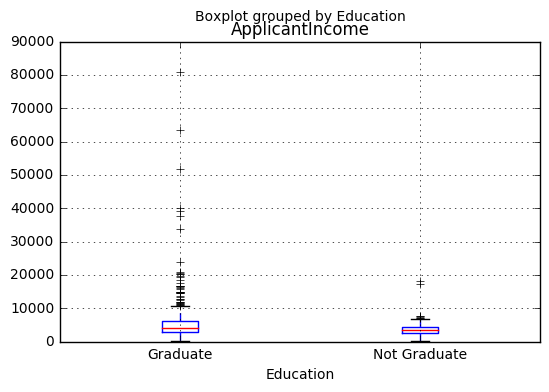

In [22]:
# We then draw boxplots of applicant income by education level
# We can see that there is no substantial different between the mean income of graduate and non-graduates. 
# But there are a higher number of graduates with very high incomes, which are appearing to be the outliers
df.boxplot(column='ApplicantIncome', by = 'Education')

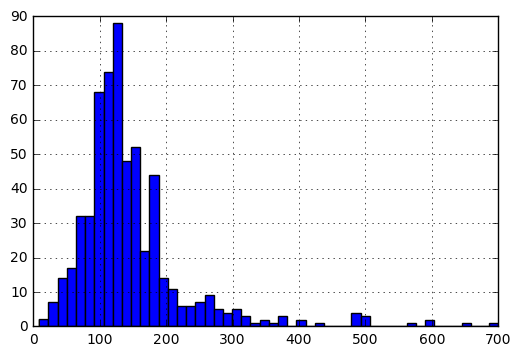

In [23]:
# Histogram of loan amount
df['LoanAmount'].hist(bins=50)

/Users/yingwu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x11717acc0>],
 'caps': [<matplotlib.lines.Line2D at 0x117183fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11718df28>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x117188fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11717af60>,
  <matplotlib.lines.Line2D at 0x117183e48>]}

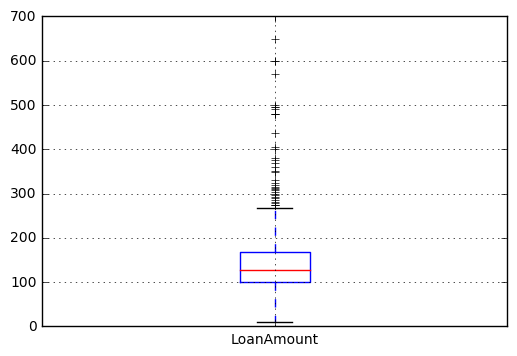

In [24]:
# Boxplot of loan amount
# LoanAmount has missing and extreme values
# Both ApplicantIncome and LoanAmount require data munging.
df.boxplot(column='LoanAmount')

In [26]:
# Data Reshape
# The chances of getting a loan based on credit history
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:' )
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


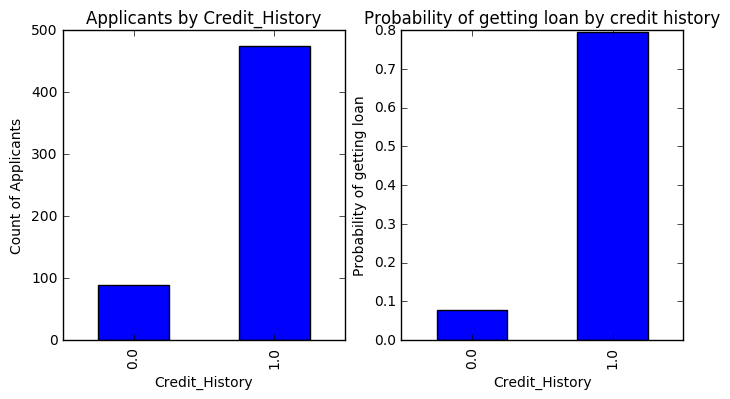

In [27]:
# Bar plot of credit history
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')
# Bar plot of probability of getting a loan by credit history
# The chances of getting a loan are eight times higher if the applicant has a valid credit history. 
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

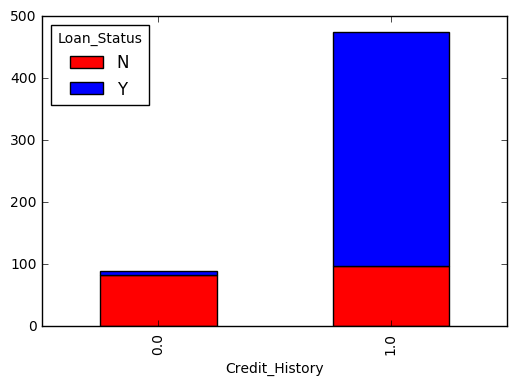

In [30]:
# Stacked chart
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'])

# Missing values

In [31]:
# Check missing values in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
# Different ways of filling missing values
# 1. Fill missing values by mean
# df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

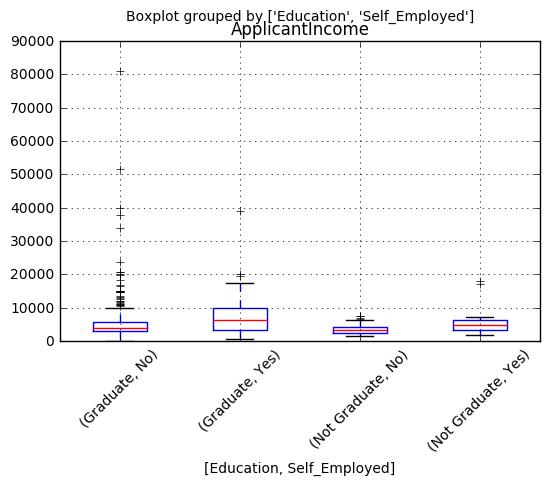

In [33]:
# 2. Key hypothesis is that whether a person is educated or self-employed can combine 
# to give a good estimate of loan amount
# So we create boxplots of loan amount by education level and employment status
df.boxplot(column='ApplicantIncome', by = ['Education','Self_Employed'], rot = 45)

In [34]:
# We see some variations in the median of loan amount for each group and this can be used to impute the values. 
# But first, we need to ensure that each of Self_Employed and Education variables should not have missing values.
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [35]:
# Since majority value is “No”, we impute the missing values as “No” as there is a high probability of success.
df['Self_Employed'].fillna('No',inplace=True)

In [36]:
# We will create a Pivot table, which provides us median values for all the groups of unique values 
# of Self_Employed and Education. 
# Next, we define a function, which returns the values of these cells and apply it 
# to fill the missing values of loan amount
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [37]:
# Check missing values
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
# Frequency tables
gender = df['Gender'].value_counts()
married = df['Married'].value_counts()
dependents = df['Dependents'].value_counts()
credit = df['Credit_History'].value_counts()

print('Frequency table for Gender:')
print(gender)
print('\nFrequency table for Married:')
print(married)
print('\nFrequency table for Dependents:')
print(dependents)
print('\nFrequency table for Credit_History:')
print(credit)

Frequency table for Gender:
Male      489
Female    112
Name: Gender, dtype: int64

Frequency table for Married:
Yes    398
No     213
Name: Married, dtype: int64

Frequency table for Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency table for Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [39]:
# Fill with majority
df['Gender'].fillna('Male',inplace=True)
df['Married'].fillna('Yes',inplace=True)
df['Dependents'].fillna('0',inplace=True)
# Fill with mean
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
# Fill with median
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)

# Outliers

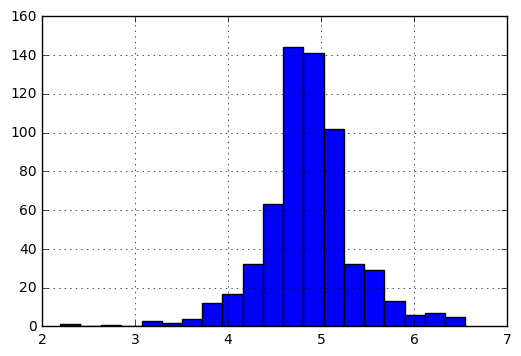

In [40]:
# LoanAmount
# Since the extreme values are practically possible, i.e. some people might apply for high value loans 
# due to specific needs. 
# So instead of treating them as outliers, let’s try a log transformation to nullify their effect
# The distribution looks much closer to normal and effect of extreme values has been significantly subsided
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

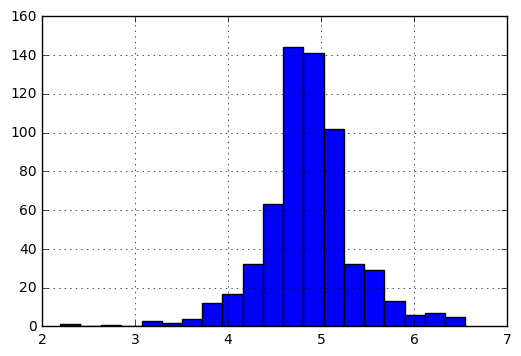

In [41]:
# ApplicantIncome
# One possible explanation is that some applicants have lower income but strong support Co-applicants. 
# So it might be a good idea to combine both incomes as total income and take a log transformation of the same.
# We see that the distribution is much better than before.
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

# Predictive modeling

In [42]:
# To use scikit-learn, we need to convert all categorical variables into numeric
from sklearn import preprocessing
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = preprocessing.LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [43]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,1,4.867534,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [44]:
# Import models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

# Define a function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    # Fit the model
    model.fit(data[predictors],data[outcome])
  
    # Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    # Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ('Accuracy : %s' % '{0:.3%}'.format(accuracy))

    # Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
    # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    # Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

    # Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

In [45]:
# Logistic regression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [47]:
# Use different combination of variables
# The accuracy and cross-validation score are not getting impacted by less important variables. 
# Maybe this model is not best to explain variation in data. So we should try other models
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [48]:
# Decision tree
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [49]:
# The model based on categorical variables is unable to have an impact because Credit History is dominating over them
# We can try numeric variables
# We observe that although the accuracy went up on adding variables, the cross-validation error went down. 
# This is the result of model over-fitting the data.
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 69.374%


In [57]:
# Random forest - more sophisticated model
# We see that the accuracy is 100% for the training set. This is a case of overfitting
# It can be resolved in two ways:
# 1. Reducing the number of predictors
# 2. Tuning the model parameters
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.342%


In [58]:
# Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

TotalIncome_log     0.265554
Credit_History      0.265470
LoanAmount_log      0.229702
Dependents          0.054649
Property_Area       0.050019
Loan_Amount_Term    0.044663
Married             0.025349
Education           0.023057
Gender              0.020866
Self_Employed       0.020670
dtype: float64


In [59]:
# Let’s use the top 5 variables for creating a model. 
# Also, we will modify the parameters of random forest model a little bit
# n_estimators: number of trees in the forest
# min_samples_split: minimum number of samples required to split an internal node
# max_features: The number of features to consider when looking for the best split
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.736%
Cross-Validation Score : 81.110%


In [ ]:
# Notice that although accuracy reduced, the cross-validation score is improving showing that the model is generalizing well. 